Install modules

New codes

Xarray is a powerful library to analyze geospatial data

In [ ]:
# Later in the advanced section of this tutorial (section 3.2), we will be analyzing 
# zarr data format, and the pre-installed xarray on google colab is not able to 
# do so. Thus, we need to intall the complete version of xarray to be able to do it.
!pip install xarray[complete] # this may take a few seconds

In [ ]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr
import pandas as pd

Let's download files

In [ ]:
for yr in range(2011,2022): # note that in python, the end range is not inclusive. So, in this case data for 2015 is not downloaded.
    # url = f'https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.{yr}.nc'
    url = f'https://downloads.psl.noaa.gov/Datasets/cpc_global_precip/precip.{yr}.nc'
    
    savename = url.split('/')[-1]
    urllib.request.urlretrieve(url,savename)

In [ ]:
xr.open_dataset('precip.2012.nc')

In [ ]:
# def get_data(File_name):
#   data=xr.open_dataset(File_name)
#   return data

## Global precipitation data

In [ ]:
df=pd.DataFrame()
# i=1
# df[f'prec{i}']=['xxx','ggg']
# df

In [ ]:
for i in range(2011,2022):
  file_name=f'precip.{i}.nc'
  datai=xr.open_dataset(file_name)
  precip_all_dt=datai.groupby('time.month').sum()
  mean_temp=[]
  for ii in range(1, 13):
    df1=precip_all_dt.precip[ii-1,:,:].mean().to_numpy()   #ii is month as January_Feb.. to numpy is for changeing np array
    mean_temp.append(df1)
  # plt.plot(mean_temp) 
  # plt.title(f"{i}")
  # plt.show() 
  df[f'precip{i}']=mean_temp


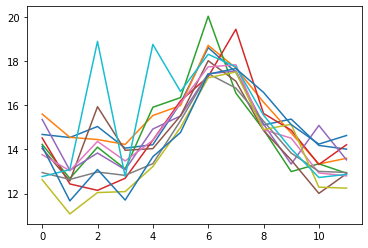

In [ ]:
df.to_csv('global_precip.csv')
plt.plot(df)
plt.show()

Let's start simple: open data for two years and concatenate them to one file:

In [ ]:
# examining global and US_data
# ds2011 = xr.open_dataset('precip.V1.0.2011.nc')
# ds2012 = xr.open_dataset('precip.V1.0.2012.nc')

dsGlo2011 = xr.open_dataset('precip.2011.nc')
dsGlo2012 = xr.open_dataset('precip.2012.nc')

ds2011

In [ ]:
# examining the data for series of data 
dsGlo2011 = xr.open_dataset('precip.2011.nc')
dsGlo2012 = xr.open_dataset('precip.2012.nc')

Let's join two layers

In [ ]:
ds2011_2012 = xr.concat([ds2011,ds2012], dim='time')
ds2011_2012

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 731)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2012-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

Now, let's try something similar, but through a more efficient way (especially if the number of files are more than two):

In [ ]:
ds2011_2014 = xr.open_mfdataset('precip.V1.0.*.nc', concat_dim='time', combine='nested')
# Or, you can use the following command to do the same thing:
# ds2011_2014 = xr.open_mfdataset('precip*.nc', combine='by_coords')

Now let's focus on 2012 and extract the monthly precipitation sum and make a simple plot of one of the months:

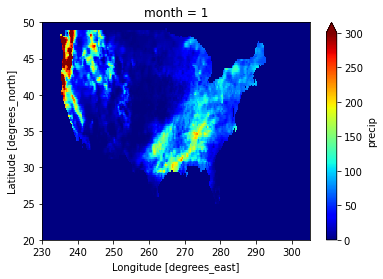

In [ ]:
# The great thing about groupby is that you do not need to worry about the leap years or 
# number of days in each month.
# In addition, xarray is label-aware and when you pass the plot function, it understands that you want to
# make a spatial plot and finds the lat and lon values and the appropriate title and labels.
ds2012_mon = ds2012.groupby('time.month').sum()
ds2012_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

Global extent

In [ ]:
ds2012_mon = dsGlo2012.groupby('time.month').sum()
ds2012_mon.precip[1,:,:].plot(cmap='jet',vmax=500)  # plotting February data 
plt.show()

In [ ]:
ds2012_mon

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, month: 12)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [ ]:
ds2011

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 365)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2011-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

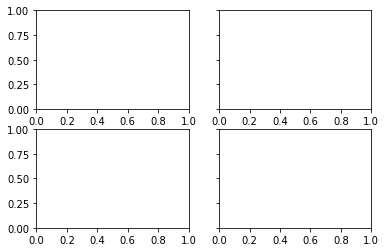

In [ ]:
fig,ax=plt.subplots(2,2, sharey=True)
ax[0,0]


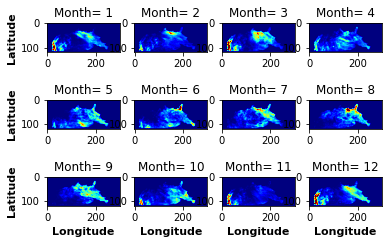

In [ ]:
from matplotlib import colorbar
from matplotlib.figure import cbar
ds2012_mon = ds2012.groupby('time.month').sum()
nrows = 3
ncols = 4
for i in range(1, 13):
    a=plt.subplot(nrows, ncols,i)
    plt.imshow(ds2012_mon.precip[i-1,:,:],cmap='jet', vmax=300,)
    plt.title(f"Month= {i}")
    plt.xlabel("");plt.ylabel("")
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')


In [ ]:
a.__dict__

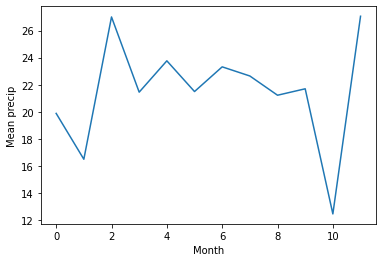

In [ ]:
mean_temp=[]
for i in range(1, 13):
  aa=ds2012_mon.precip[i-1,:,:].mean()
  mean_temp.append(aa)
plt.plot(mean_temp)
plt.xlabel('Month')
plt.ylabel('Mean precip')
plt.show()

In [ ]:
import calendar # We'll use this library to easily add month name to subplot titles.

In [ ]:
# First, We will develop a land mask data array that we can use to mask out the nan values:
landmask = ds2012.precip.sum(dim='time')>0
landmask

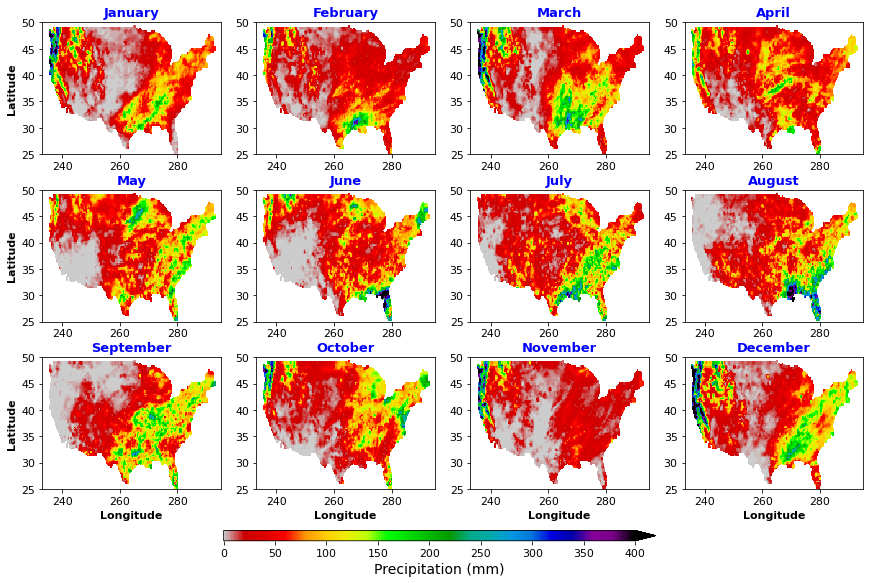

In [ ]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                    wspace=0.2, hspace=0.27) # wspace and hspace adjust the horizontal and vertical spaces, respectively.
nrows = 3
ncols = 4
for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds2012_mon.precip[i-1, :, :].where(landmask) # Remember that in Python, the data index starts at 0, but the subplot index start at 1.
    p = plt.pcolormesh(ds2012_mon.lon, ds2012_mon.lat, dataplot,
                   vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                   ) 
    plt.xlim([233,295])
    plt.ylim([25,50])
    plt.title(calendar.month_name[dataplot.month.values], fontsize = 13, 
              fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
plt.savefig('Fig_prec_cpc_mon_2012.png', format = 'png', dpi = 300)